In [8]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.2.2+cu121
2.2.2+cu121


In [9]:
import io
import os
import requests
import tarfile

import matplotlib.pyplot as plt
from IPython.display import Audio, display


_SAMPLE_DIR = "_assets"
SAMPLE_WAV_URL = r'C:\CodeProjects\University\3.2_VU\deep learning\gmmGroup\k3s2_gmmGroup\output.wav'
SAMPLE_WAV_PATH = os.path.join(_SAMPLE_DIR, "steam.wav")

In [10]:
os.makedirs(_SAMPLE_DIR, exist_ok=True)
# with open(SAMPLE_WAV_PATH, 'wb') as file_:
  # file_.write(requests.get(SAMPLE_WAV_URL).content)

In [11]:
# metadata = torchaudio.info(SAMPLE_WAV_PATH)
# print(metadata)

In [12]:
def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

In [13]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

In [14]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

Sample Rate: 16000
Shape: (1, 226048)
Dtype: torch.float32
 - Max:      0.926
 - Min:     -0.806
 - Mean:    -0.001
 - Std Dev:  0.137

tensor([[-6.9212e-06, -3.7904e-05, -2.9114e-05,  ...,  4.9018e-05,
          2.9204e-05, -7.4943e-06]])



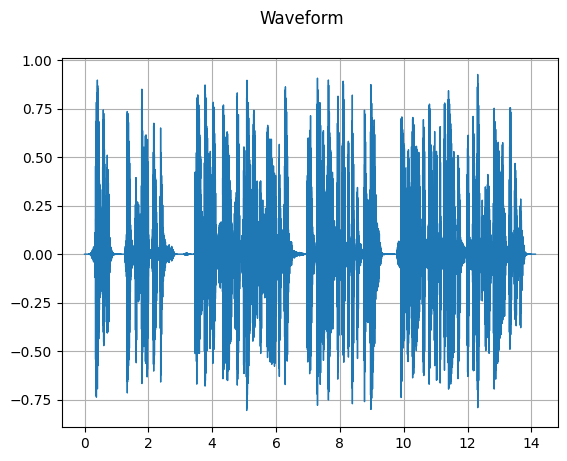

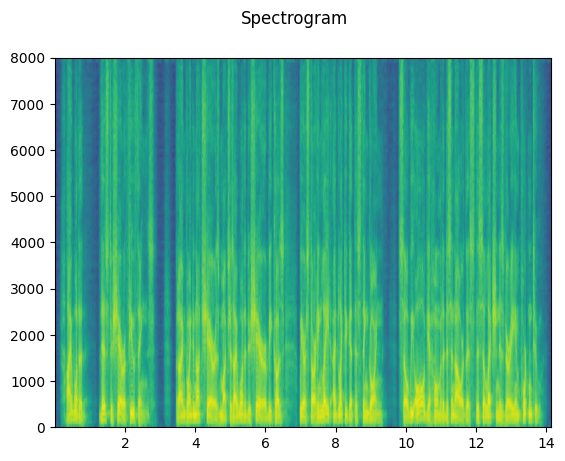

In [16]:
waveform, sample_rate = torchaudio.load(r'C:\CodeProjects\University\3.2_VU\deep learning\gmmGroup\k3s2_gmmGroup\output.wav')

print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)

In [17]:
waveform

tensor([[-6.9212e-06, -3.7904e-05, -2.9114e-05,  ...,  4.9018e-05,
          2.9204e-05, -7.4943e-06]])

In [18]:
waveform_2 = waveform * 0.6

torchaudio.save(_SAMPLE_DIR + "/sound_tylus.wav", waveform_2, sample_rate)

Sample Rate: 44100
Shape: (2, 109368)
Dtype: torch.float32
 - Max:      0.305
 - Min:     -0.270
 - Mean:     0.000
 - Std Dev:  0.071

tensor([[ 0.0016,  0.0038,  0.0055,  ...,  0.0019,  0.0028,  0.0031],
        [-0.0023, -0.0009,  0.0008,  ..., -0.0019, -0.0007, -0.0002]])



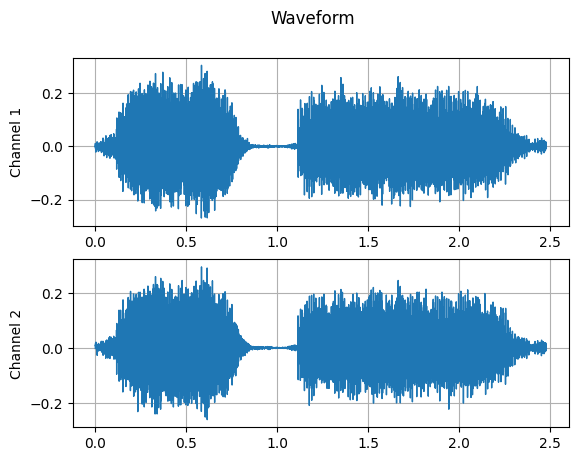

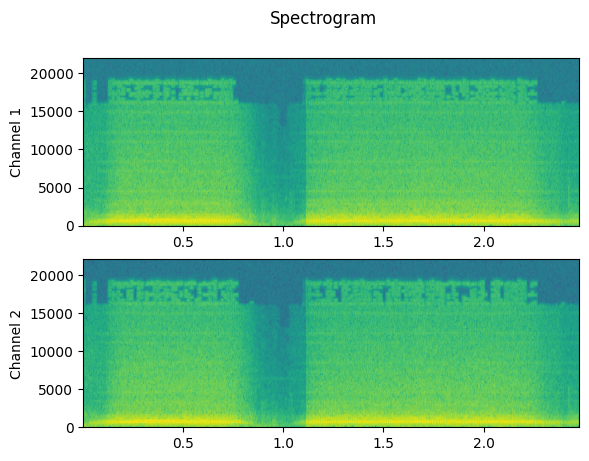

In [ ]:
print_stats(waveform_2, sample_rate=sample_rate)
plot_waveform(waveform_2, sample_rate)
plot_specgram(waveform_2, sample_rate)

In [ ]:
waveform_3 = (waveform[:, :-1000] + waveform[:, 1000:]) / 2

In [ ]:
torchaudio.save(_SAMPLE_DIR + "/sound_vidurkintas.wav", waveform_3, sample_rate)

Sample Rate: 44100
Shape: (2, 108368)
Dtype: torch.float32
 - Max:      0.401
 - Min:     -0.400
 - Mean:     0.000
 - Std Dev:  0.094

tensor([[ 2.1973e-03,  5.2643e-03,  8.3923e-03,  ..., -1.0147e-02,
         -8.9722e-03, -7.7667e-03],
        [-3.7537e-03, -2.1820e-03, -1.5259e-05,  ..., -1.3992e-02,
         -1.2421e-02, -1.0986e-02]])



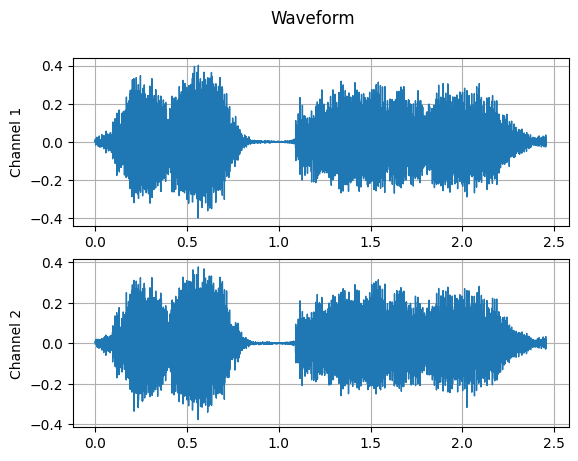

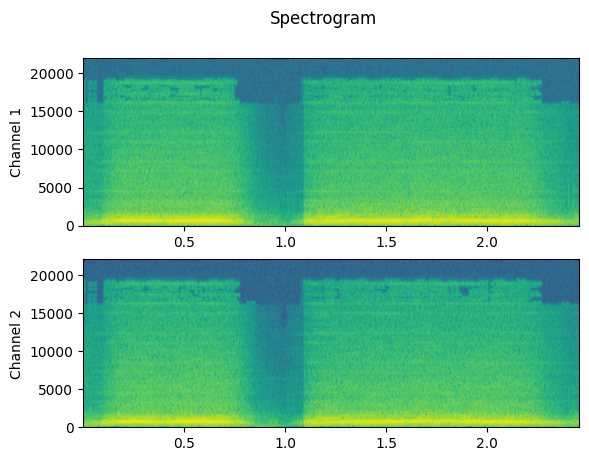

In [ ]:
print_stats(waveform_3, sample_rate=sample_rate)
plot_waveform(waveform_3, sample_rate)
plot_specgram(waveform_3, sample_rate)